In [1]:
import os
import sys

import pandas as pd

from Util import to_log2_tpm

In [4]:
nb_dir = '/data/parastou/RNAdeg/scripts/'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

--------------------------

In [7]:
out_dir = '/data/parastou/RNAdeg/plots'

-------------

### Data

In [8]:
df = pd.read_csv('/data/parastou/RNAdeg/results/RipRna/xp_data/rna_stability.csv', sep='\t')
df = to_log2_tpm(df, shift=0)
df = df.fillna(0)

# Keep only protein coding genes
df = df[(df['category']=='repeat') | (df['type']=='gene')]

/data/parastou/RNAdeg/pyRNAdeg/Util.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_df[col] = new_df[col].apply(lambda x: log((x + shift), 2))


8 columns contained zero values. Their log-transformed results are NaNs


----------------------------

## Create Boxplots for RNA stability values

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [10]:
from Viz import prepare_4cat_data, multi_4cat_box_plot

## Plot wt

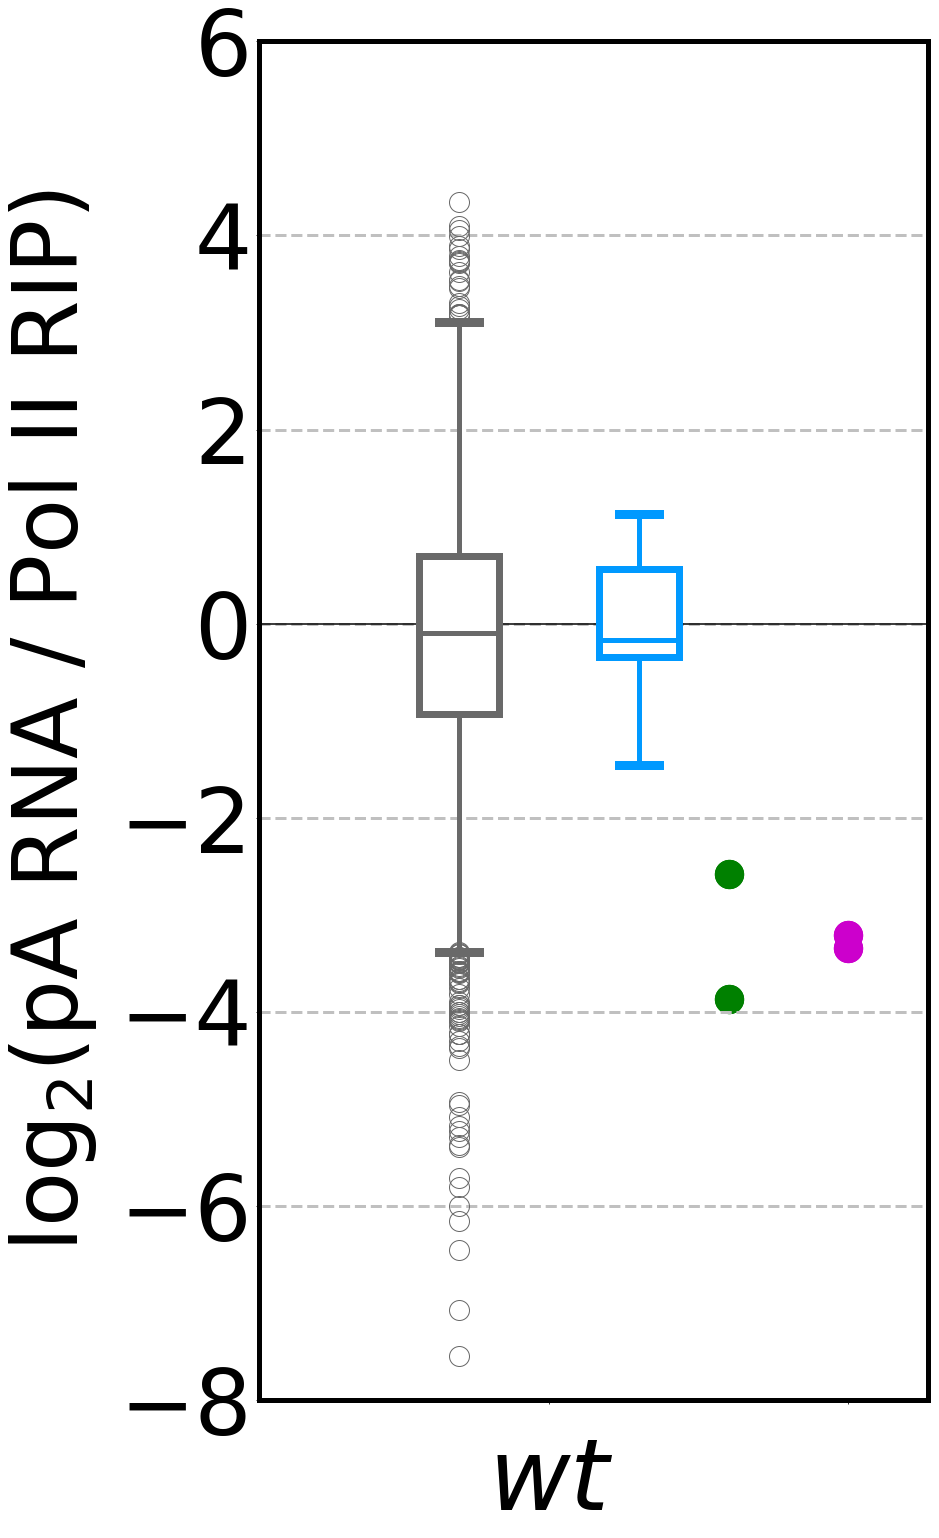

In [13]:
# data and labels
samples = ['WT']
x_labels = ['wt']
data = prepare_4cat_data(df, samples)

# path and plot
outpath = os.path.join(out_dir, 'Figure1-D.png')
multi_4cat_box_plot(data, samples, x_labels, outpath, figsize=(12, 25), dist=3, 
                    y_label='$\mathrm{log_2(pA\ RNA\ /\ Pol\ II\ RIP)}$', y_lim=(-8, 6), 
                    widths=.8, hlines=[(0,'black')], xlable_size=100, ylable_size=90)

--------------------

## WT + clr4Δ

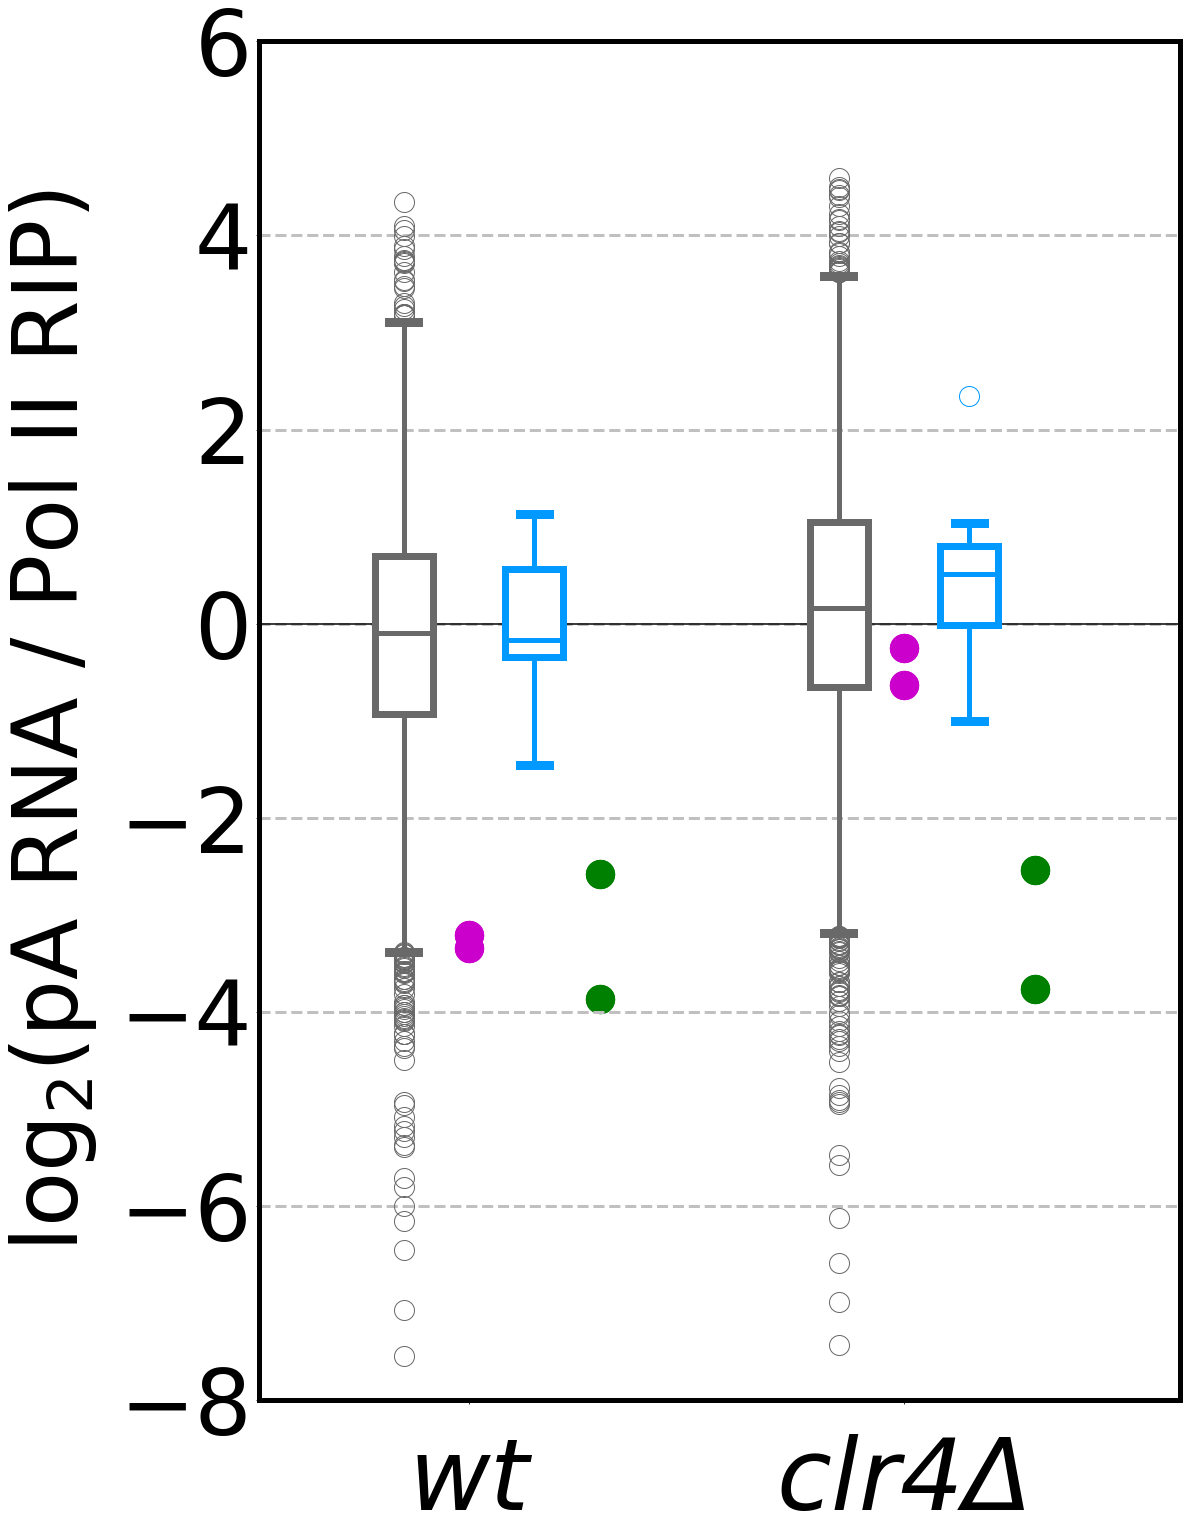

In [14]:
# data and labels
samples = ['WT', '80']
x_labels = ['wt', 'clr4Δ']
data = prepare_4cat_data(df, samples)

# path and plot
outpath = os.path.join(out_dir, 'Figure2-C.png')
multi_4cat_box_plot(data, samples, x_labels, outpath, figsize=(16.5, 25), dist=6, 
                    y_label='$\mathrm{log_2(pA\ RNA\ /\ Pol\ II\ RIP)}$', y_lim=(-8, 6), annotate=False, 
                    widths=.8, hlines=[(0,'black')], xlable_size=100, ylable_size=90)

--------------------

## Mutants

## Mutant group1

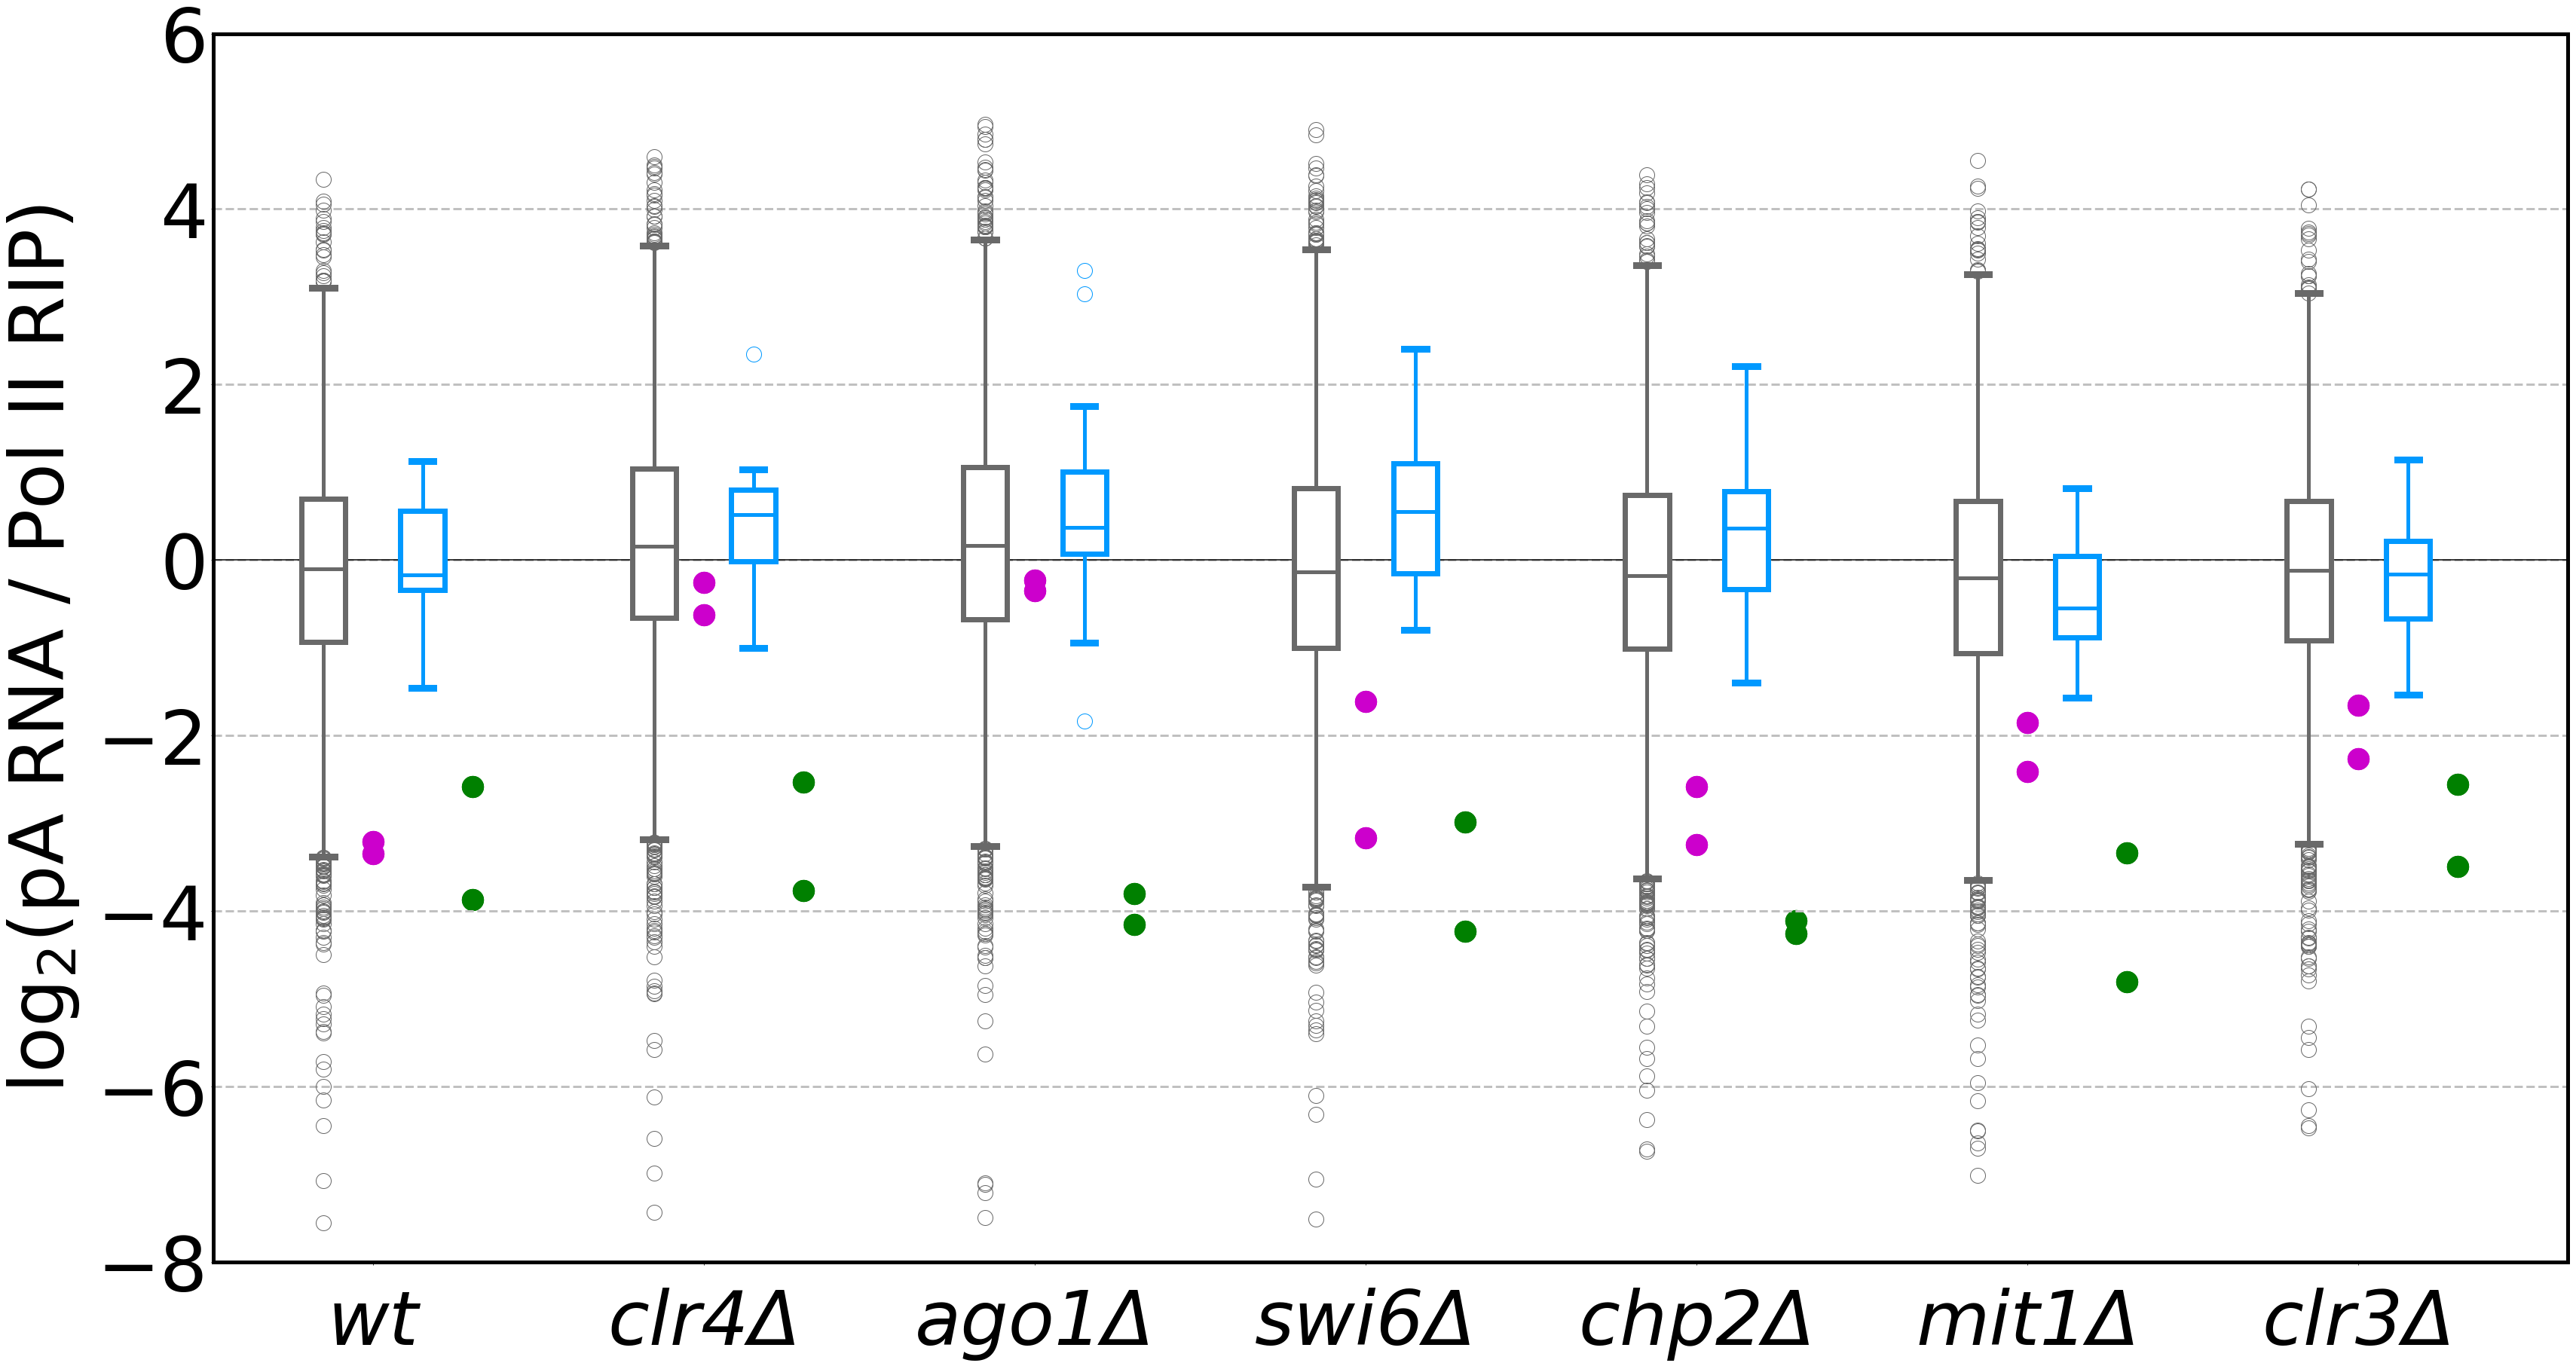

In [16]:
# data and labels
samples = ['WT', '80', '638', '301', '324', '491', '302']
x_labels = ['wt', 'clr4Δ', 'ago1Δ', 'swi6Δ', 'chp2Δ', 'mit1Δ' ,'clr3Δ']
data = prepare_4cat_data(df, samples)

# path and plot
out_path = os.path.join(out_dir, 'Figure3-E.png')
multi_4cat_box_plot(data, samples, x_labels, out_path, figsize=(56, 30), 
                    dist=6, y_label='$\mathrm{log_2(pA\ RNA\ /\ Pol\ II\ RIP)}$', y_lim=(-8, 6), 
                    hlines=[(0, 'black')], widths=.8, xlable_size=100, ylable_size=100)

----

## Mutant group2

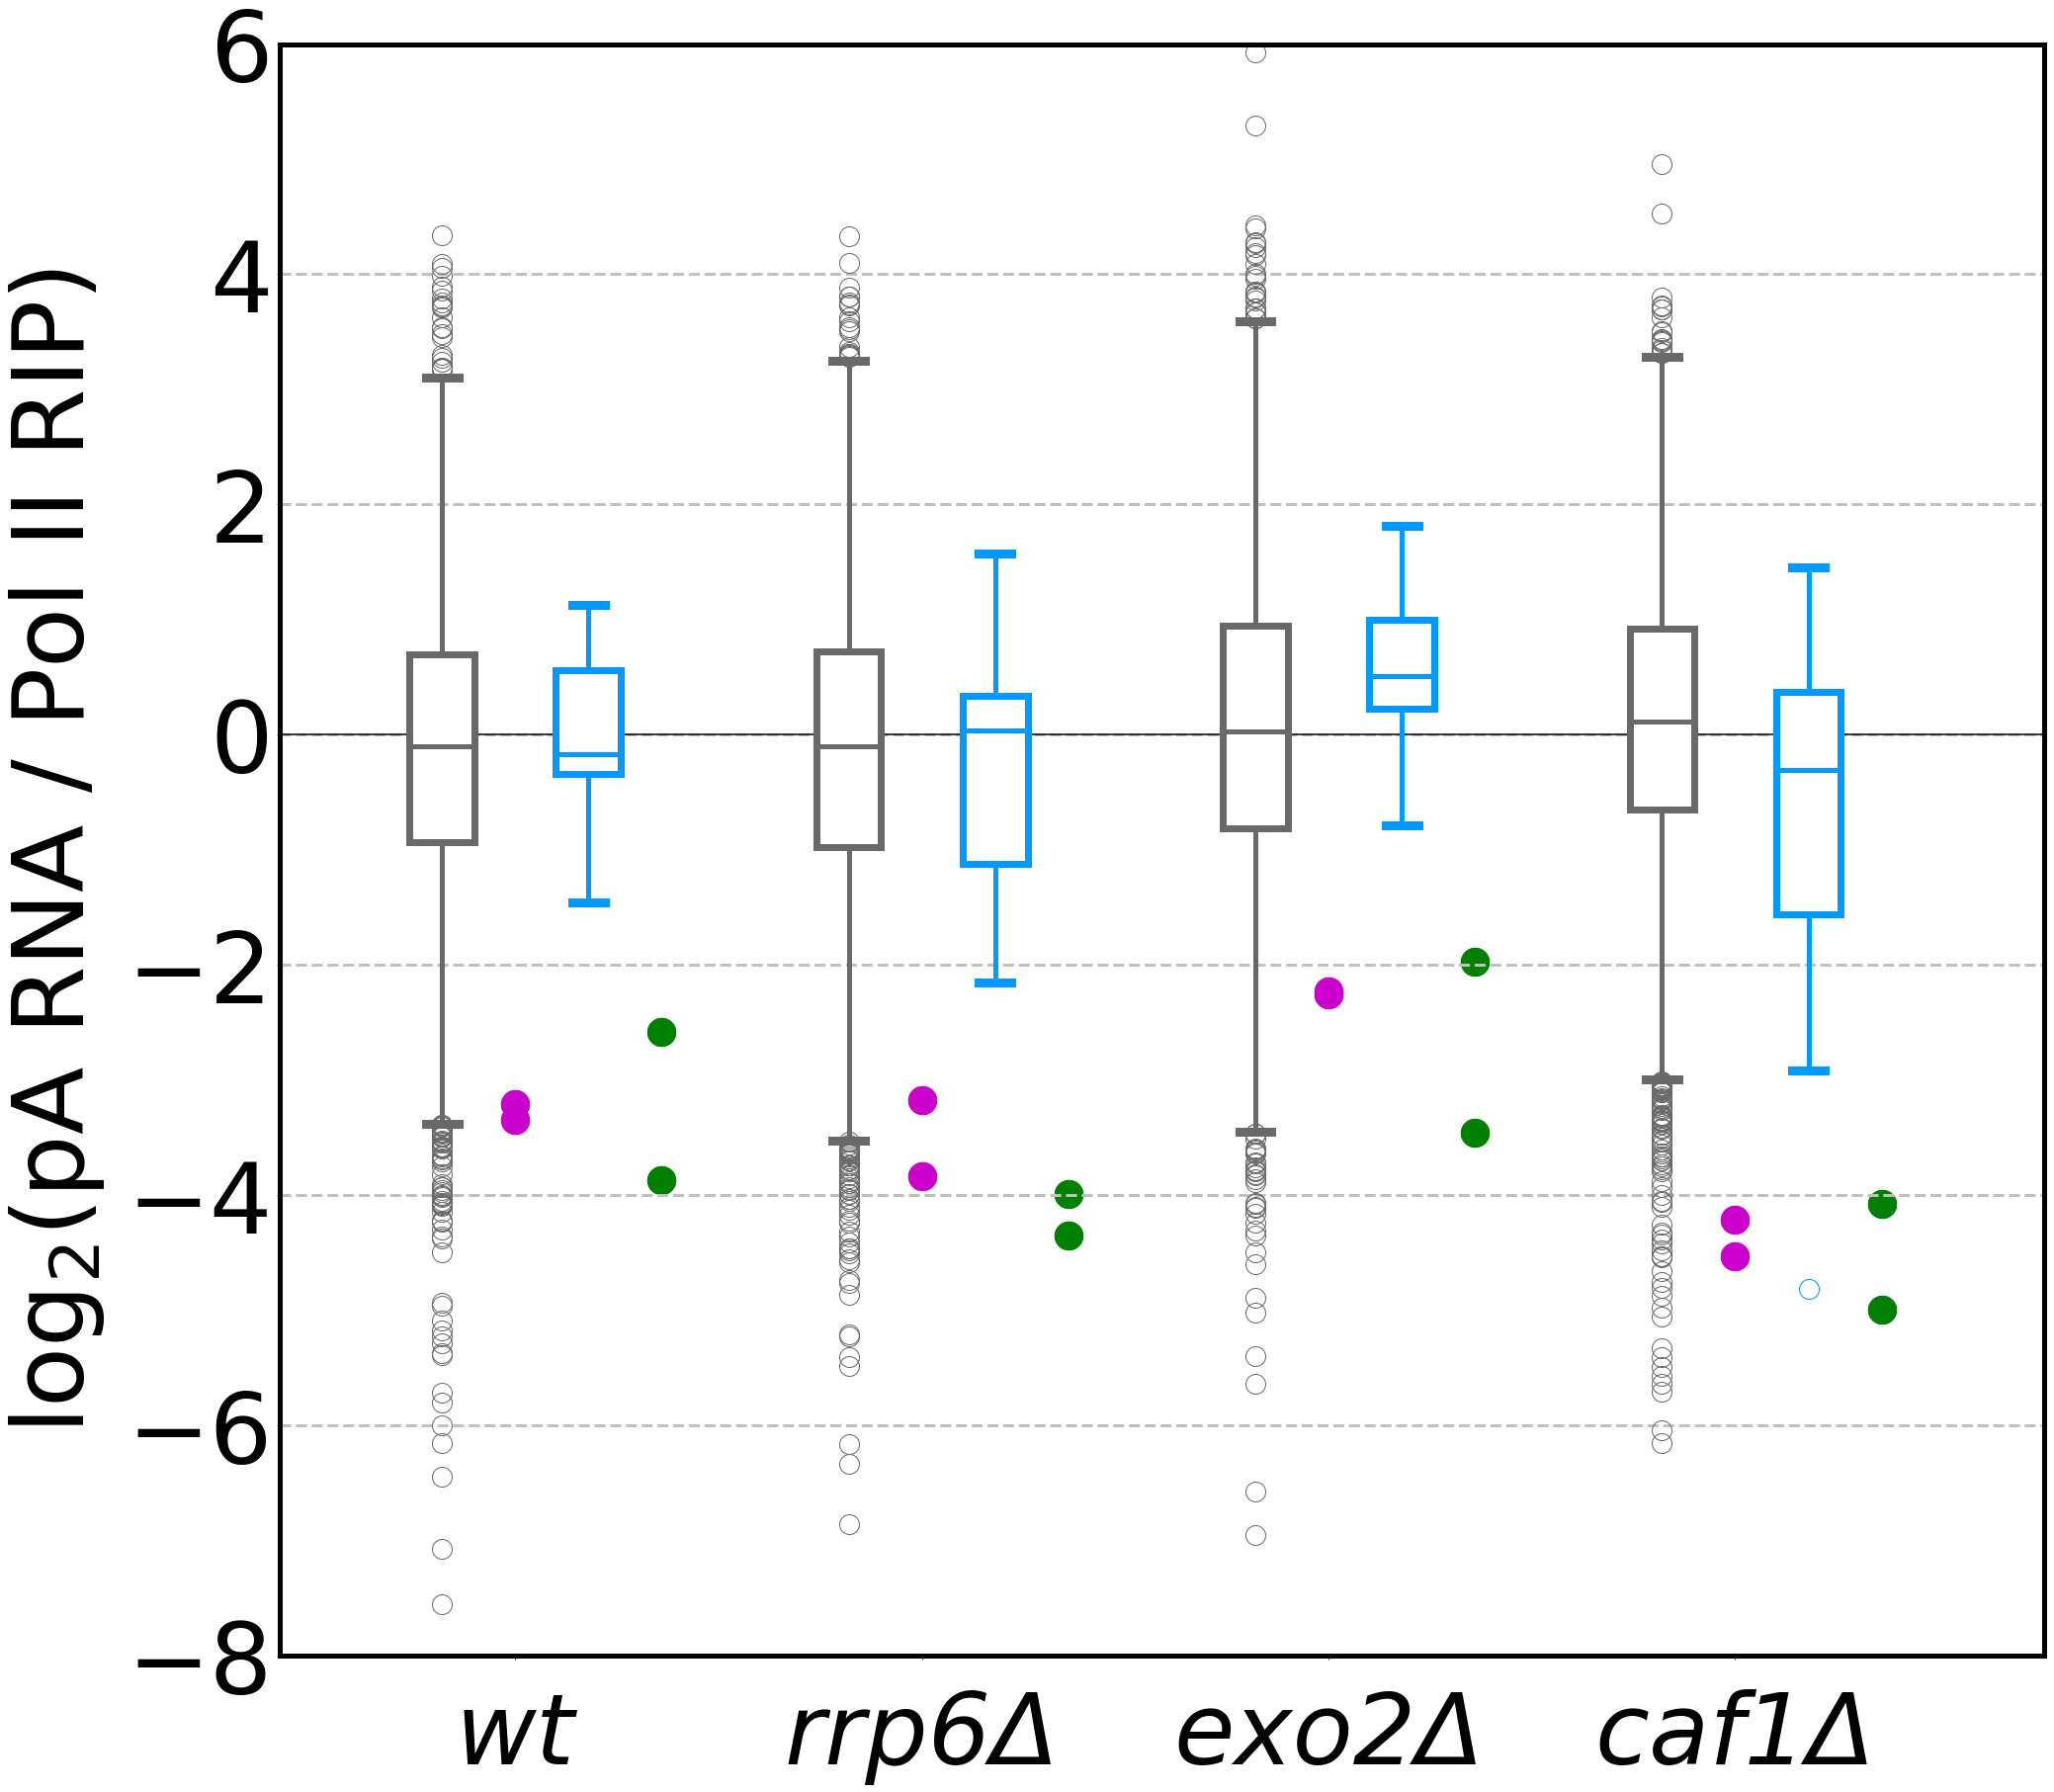

In [17]:
# data and labels
samples = ['WT', '504', '530', '510']
x_labels = ['wt', 'rrp6Δ', 'exo2Δ', 'caf1Δ']
data = prepare_4cat_data(df, samples)

# paths and plot
out_path = os.path.join(out_dir, 'Figure3-F.png')
multi_4cat_box_plot(data, samples, x_labels, out_path, figsize=(32, 30), 
                    dist=5, y_label='$\mathrm{log_2(pA\ RNA\ /\ Pol\ II\ RIP)}$', y_lim=(-8, 6), 
                    hlines=[(0, 'black')], widths=.8, xlable_size=100, ylable_size=100)